<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [1]:
import pandas as pd

In [4]:
# Change the path to the dataset file if needed. 
PATH = './data/athlete_events.csv'

In [28]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- 14 and 12 
- 16 and 12
- 13 and 11

In [30]:
data.Year.dtype

dtype('int64')

In [35]:
age = data.loc[data.Year==1996,['Sex','Age']]

In [36]:
age.groupby('Sex')['Age'].min()

Sex
F    12.0
M    14.0
Name: Age, dtype: float64

__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- 1.5 
- 2.5
- 7.7

In [147]:
sport2000 = data.loc[(data.Year==2000) &  (data.Sex=='M'),['Name','Sport']]

In [148]:
sport2000 = sport2000.drop_duplicates(['Name'])

In [149]:
sport2000.shape[0]

6576

In [150]:
sport2000.Sport.unique()

array(['Badminton', 'Athletics', 'Wrestling', 'Rowing', 'Swimming',
       'Taekwondo', 'Diving', 'Football', 'Tennis', 'Cycling', 'Hockey',
       'Basketball', 'Sailing', 'Volleyball', 'Shooting', 'Boxing',
       'Gymnastics', 'Baseball', 'Handball', 'Fencing', 'Canoeing',
       'Water Polo', 'Beach Volleyball', 'Archery', 'Weightlifting',
       'Table Tennis', 'Equestrianism', 'Judo', 'Modern Pentathlon',
       'Triathlon', 'Trampolining'], dtype=object)

In [156]:
sport2000.groupby('Sport').count().reset_index()

,Sport,Name
0,Archery,64
1,Athletics,1257
2,Badminton,85
3,Baseball,192
4,Basketball,144
5,Beach Volleyball,48
6,Boxing,307
7,Canoeing,249
8,Cycling,341
9,Diving,80


In [154]:
sport2000.loc[sport2000.Sport=='Gymnastics',].count()

Name     97
Sport    97
dtype: int64

In [157]:
sport2000.loc[sport2000.Sport=='Gymnastics',['Name']].count()/sport2000.shape[0]*100

Name    1.475061
dtype: float64

__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [74]:
female2000Basketball = data.loc[(data.Sex=='F')&(data.Year==2000) &(data.Sport=='Basketball'),['Name','Height']]
female2000Basketball = female2000Basketball.drop_duplicates(['Name'])

In [75]:
female2000Basketball.Height.mean()

182.38732394366198

In [76]:
female2000Basketball.Height.std()

9.139462087892174

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- Bobsleigh 
- Weightlifting
- Boxing

In [86]:
olympics2002 = data.loc[data.Year==2002,['Name','Weight','Sport']]
olympics2002 = olympics2002.drop_duplicates(['Name'])

In [88]:
olympics2002.sort_values('Weight',ascending= False).head(1)

,Name,Weight,Sport
99154,Emmanuel Hostache,123.0,Bobsleigh


__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- 3 

In [89]:
paweAbr = data.loc[data.Name=='Pawe Abratkiewicz',['Year']].drop_duplicates()

In [90]:
paweAbr

,Year
997,1992
999,1998
1001,2002


__6. How many silver medals in tennis did Australia win at the 2000 Olympics?__

- 0
- 1 
- 2 
- 3 

In [91]:
aus2000tennis = data.loc[(data.Year==2000) & (data.Team=='Australia') & (data.Sport=='Tennis') & (data.Medal=='Silver'),['Name']]
aus2000tennis

,Name
262820,Todd Andrew Woodbridge
262831,Mark Raymond Woodforde


__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- Yes 
- No

In [99]:
oly2016 = data.loc[(data.Year==2016) & (data.Team.isin(['Serbia','Switzerland'])), ['Team','Medal']]

In [101]:
oly2016 = oly2016.dropna()

In [103]:
oly2016.groupby(['Team']).count()

,Medal
Team,
Serbia,54
Switzerland,11


__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [110]:
%matplotlib inline

In [109]:
data2014 = data.loc[data.Year==2014,['Name','Age']].drop_duplicates(['Name'])

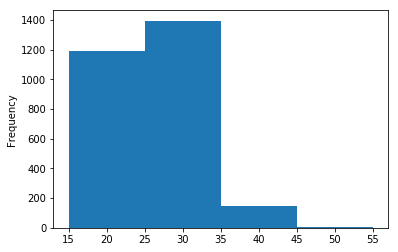

In [114]:
data2014.Age.plot.hist(bins=4)

__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- No, Yes 
- No, No 

In [134]:
dataSeasongrp = data.loc[data.City.isin(['Lake Placid','Sankt Moritz']),['City', 'Season']].groupby(['Season','City']).count()

In [135]:
dataSeasongrp

Empty DataFrame
Columns: []
Index: [(Winter, Lake Placid), (Winter, Sankt Moritz)]

__10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?__

- 16
- 24
- 26
- 34

In [144]:
len(data.loc[data.Year==1995,'Sport'].unique())

0

In [145]:
len(data.loc[data.Year==2016,'Sport'].unique())

34